In [1]:
import os
import numpy as np
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from sklearn.model_selection import train_test_split
from google.colab import drive

In [16]:
drive.mount('/content/drive')


Mounted at /content/drive


In [18]:
data_dir = '/content/drive/MyDrive/CVdataset/'

# Step 3: Split your dataset
validation_split = 0.2
random_state = 42

# Get the list of class names (folder names)
class_names = sorted(os.listdir(data_dir))

# Create a list to hold the images and labels
images = []
labels = []

# Load the images and labels from the dataset folders
for i, class_name in enumerate(class_names):
    class_dir = os.path.join(data_dir, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        images.append(img_path)
        labels.append(i)

In [22]:
# Step 4: Data preprocessing
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    horizontal_flip=True,
    rotation_range=20)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=34,
    class_mode='categorical',
    subset='training')

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=34,
    class_mode='categorical',
    subset='validation')


# Step 5: Model training
base_model = MobileNet(weights='imagenet', include_top=False)

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully connected layer
x = Dense(256, activation='relu')(x)

# Add an output layer with the number of classes
num_classes = len(class_names)
predictions = Dense(num_classes, activation='softmax')(x)

Found 1990 images belonging to 6 classes.
Found 0 images belonging to 6 classes.


17225924/17225924 [==============================] - 2s 0us/step


In [39]:
# Build the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=20,
    epochs=5,
    validation_data=val_generator,
    validation_steps=20)



Epoch 1/5


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:2918: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


20/20 [==============================] - 197s 10s/step - loss: 0.0604 - accuracy: 0.9912
Epoch 2/5
 6/20 [========>.....................] - ETA: 2:13 - loss: 0.0446 - accuracy: 0.9951

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:2918: DecompressionBombWarning: Image size (98037975 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


20/20 [==============================] - 175s 9s/step - loss: 0.0366 - accuracy: 0.9912
Epoch 3/5
20/20 [==============================] - 153s 8s/step - loss: 0.0258 - accuracy: 0.9941
Epoch 4/5
20/20 [==============================] - 149s 8s/step - loss: 0.0412 - accuracy: 0.9824
Epoch 5/5
20/20 [==============================] - 145s 7s/step - loss: 0.0211 - accuracy: 0.9926


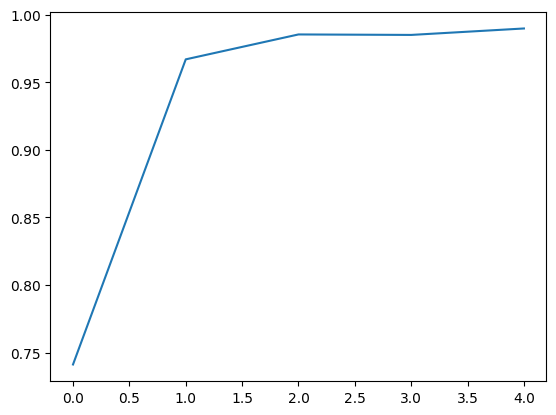

In [37]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.show()

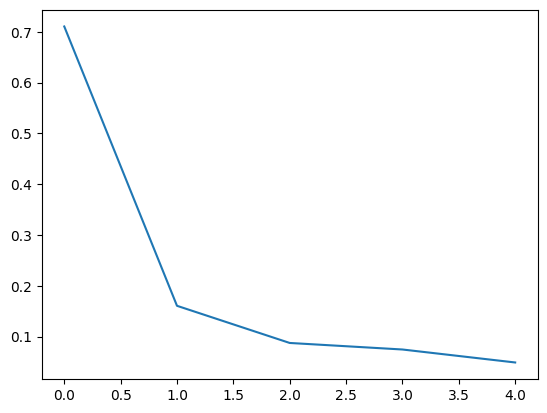

In [38]:
plt.plot(history.history['loss'])
plt.show()